[ 0.34727322  0.00728832  0.53615372 ...  1.07761115 -0.48852299
 -0.42084081]
354
迭代次数：100,  loss值：0.65879297
迭代次数：200,  loss值：0.45392793
迭代次数：300,  loss值：0.33683515
迭代次数：400,  loss值：0.27156311
迭代次数：500,  loss值：0.23424567
迭代次数：600,  loss值：0.21107636
迭代次数：700,  loss值：0.19508490
迭代次数：800,  loss值：0.18303314
迭代次数：900,  loss值：0.17341208
迭代次数：1000,  loss值：0.16545159
迭代次数：1100,  loss值：0.15870337
迭代次数：1200,  loss值：0.15287676
迭代次数：1300,  loss值：0.14777122
迭代次数：1400,  loss值：0.14324392
迭代次数：1500,  loss值：0.13919130
迭代次数：1600,  loss值：0.13553673
迭代次数：1700,  loss值：0.13222224
迭代次数：1800,  loss值：0.12920287
迭代次数：1900,  loss值：0.12644278
迭代次数：2000,  loss值：0.12391267
迭代次数：2100,  loss值：0.12158803
迭代次数：2200,  loss值：0.11944795
迭代次数：2300,  loss值：0.11747428
迭代次数：2400,  loss值：0.11565106
迭代次数：2500,  loss值：0.11396409
迭代次数：2600,  loss值：0.11240061
迭代次数：2700,  loss值：0.11094917
迭代次数：2800,  loss值：0.10959933
迭代次数：2900,  loss值：0.10834166
迭代次数：3000,  loss值：0.10716758
迭代次数：3100,  loss值：0.10606938
迭代次数：3200,  loss值：0.1050400

迭代次数：27400,  loss值：0.06908152
迭代次数：27500,  loss值：0.06904660
迭代次数：27600,  loss值：0.06901200
迭代次数：27700,  loss值：0.06897772
迭代次数：27800,  loss值：0.06894370
迭代次数：27900,  loss值：0.06891000
迭代次数：28000,  loss值：0.06887662
迭代次数：28100,  loss值：0.06884357
迭代次数：28200,  loss值：0.06881081
迭代次数：28300,  loss值：0.06877832
迭代次数：28400,  loss值：0.06874618
迭代次数：28500,  loss值：0.06871432
迭代次数：28600,  loss值：0.06868274
迭代次数：28700,  loss值：0.06865146
迭代次数：28800,  loss值：0.06862050
迭代次数：28900,  loss值：0.06858998
迭代次数：29000,  loss值：0.06855948
迭代次数：29100,  loss值：0.06852943
迭代次数：29200,  loss值：0.06849965
迭代次数：29300,  loss值：0.06847019
迭代次数：29400,  loss值：0.06844106
迭代次数：29500,  loss值：0.06841215
迭代次数：29600,  loss值：0.06838357
迭代次数：29700,  loss值：0.06835531
迭代次数：29800,  loss值：0.06832732
迭代次数：29900,  loss值：0.06829963
迭代次数：30000,  loss值：0.06827224


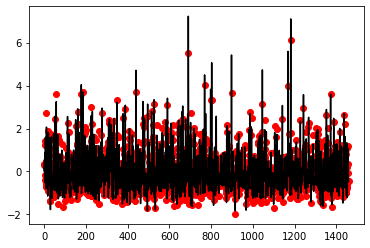

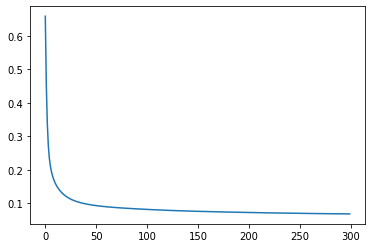

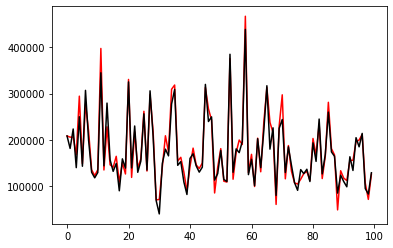

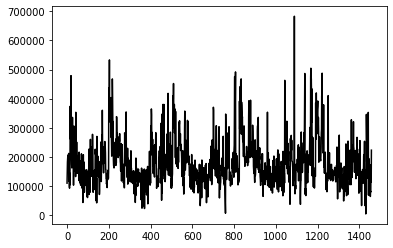

In [1]:
# 1 导入需要的模块、包等
import torch
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np
%matplotlib inline

# 2 数据处理
# 2.1  加载数据
train_data = pd.read_csv("./kg_train.csv")
test_data = pd.read_csv("./kg_test.csv")

# print(train_data.shape)
# print(test_data.shape)
#
# print(train_data.head())

# 2.2 数据拼接
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:]))

# 2.3 数据预处理:数值特征标准化处理，缺失值用0填充
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))
all_features = all_features.fillna(0)

train_labels_mean = np.mean(train_data.SalePrice.values)
train_labels_std = np.std(train_data.SalePrice.values)

train_labels = (train_data.SalePrice.values - train_labels_mean) / train_labels_std

print(train_labels)
# 2.4 数据预处理:非数值特征one-hot编码
all_features = pd.get_dummies(all_features, dummy_na=True)

# 2.5 转为numpy的数据类型，再转为tensor
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float)
train_labels = torch.tensor(train_labels, dtype=torch.float).unsqueeze(1)

test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float)
print(train_features.shape[1])

# 3 创建模型
class PolyLinearRegression(nn.Module):
    def __init__(self, input_feature_numbers, out_labels_numbers):
        super(PolyLinearRegression, self).__init__()
        self.ploy = nn.Linear(input_feature_numbers, out_labels_numbers)

    def forward(self, x):
        out = self.ploy(x)
        return out

# 4 模型训练与测试
def train_and_test():
    if torch.cuda.is_available():
        device = torch.device("cuda:0")
        model = PolyLinearRegression(train_features.shape[1], train_labels.shape[1])
        model.to(device)
    else:
        device = torch.device("cpu")
        model = PolyLinearRegression(train_features.shape[1], train_labels.shape[1])
        model.to(device)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    loss_list = []
    for i in range(30000):
        i += 1

        output_y = model(train_features)
        # 计算损失
        loss = criterion(output_y, train_labels)

        # 2 反向传播
        # 梯度要清0
        optimizer.zero_grad()
        loss.backward()
        # 更新权重参数
        optimizer.step()

        # 打印
        if i % 100 == 0:
            print("迭代次数：%d,  loss值：%.8f" % (i, loss.item()))
            loss_list.append(loss.item())

    # 测试模式
    model.eval()
    predict = model(train_features).data.numpy()

    plt.plot(predict, "ro")
    plt.plot(train_labels, "k")
    plt.show()

    plt.plot(loss_list)
    plt.show()
    plt.show()

    predict_price = predict * train_labels_std + train_labels_mean
    plt.plot(predict_price[0:100], "r")
    plt.plot(train_data.SalePrice.values[0:100], "k")
    plt.show()

    # 假设训练集和测试集同分布
    test_result = model(test_features).detach().numpy() * train_labels_std + train_labels_mean

    plt.plot(test_result, "k")
    plt.show()


train_and_test()